In [6]:
import os
os.chdir("D:/WORK/Great Lakes/5th Term/PAM/Class 6")
os.getcwd()

'D:\\WORK\\Great Lakes\\5th Term\\PAM\\Class 6'

In [7]:
#Cluster Analysis-  K-Means  clustering 
#Example Problem Adopted from Machine Learning using Python(Dinesh Kumar)

In [8]:
# Import Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
mydata = pd.read_csv("Beer.csv")
mydata.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [10]:
# Standardizing the variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=mydata.iloc[:,1:5]
scaled_mydata=scaler.fit_transform(X)
Y=scaled_mydata

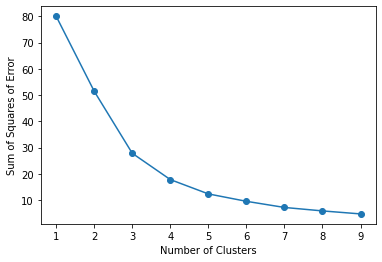

In [11]:
from sklearn.cluster import KMeans
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_mydata)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))        
plt.ylabel("Sum of Squares of Error")
plt.xlabel("Number of Clusters")
plt.plot(cluster_range,cluster_errors,marker="o")

In [12]:
#Building the KMeans Cluster
k=3
clusters=KMeans(k,random_state=42)
clusters.fit(scaled_mydata)
mydata["clusterid"]=clusters.labels_
mydata

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0


In [13]:
mydata[mydata.clusterid==0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [14]:
mydata[mydata.clusterid==1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [15]:
mydata[mydata.clusterid==2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [16]:
# Profiling the Clusters
table=pd.pivot_table(mydata,values=["calories","sodium","alcohol","cost"],index=["clusterid"])
table

,alcohol,calories,cost,sodium
clusterid,,,,
0,3.3250,105.375,0.4475,10.875
1,4.7875,148.375,0.4075,21.125
2,4.9750,155.250,0.7625,10.750


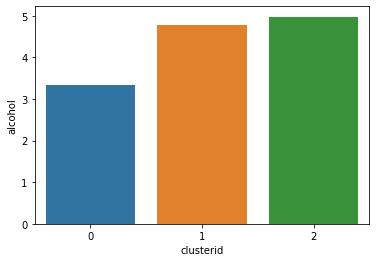

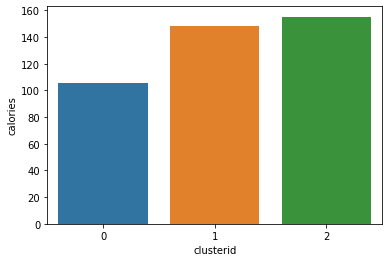

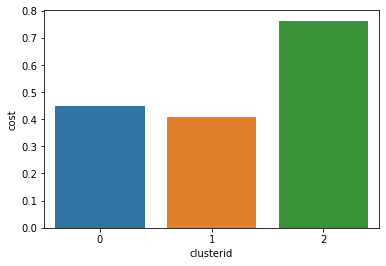

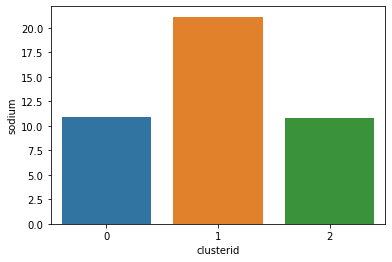

In [17]:
#Differentiation
sns.barplot(x=mydata.clusterid,y=mydata.alcohol,ci=None)
plt.show()
sns.barplot(x=mydata.clusterid,y=mydata.calories,ci=None)
plt.show()
sns.barplot(x=mydata.clusterid,y=mydata.cost,ci=None)
plt.show()
sns.barplot(x=mydata.clusterid,y=mydata.sodium,ci=None)
plt.show()

In [18]:
# Confirming the Clusters by discriminant analysis

In [19]:
X=mydata.iloc[:,1:5]
X.shape

(20, 4)

In [20]:
Y=mydata["clusterid"]

[[ 1.51980382  0.70707325]
 [ 1.54261535  1.64054154]
 [ 0.67671356 -2.25854681]
 [-5.2779941   0.5594784 ]
 [-6.28793306  0.5090728 ]
 [ 4.98274711  1.84745736]
 [ 2.32350783  3.50031611]
 [ 1.76924973  2.58844727]
 [ 1.30341662 -1.50232467]
 [ 2.10995909 -1.9536116 ]
 [ 1.27180826  0.95608912]
 [ 0.63752826 -0.87553021]
 [-0.10819949 -0.5511572 ]
 [-6.05502514  1.37060662]
 [-6.76173176 -0.30137529]
 [ 2.40898846 -3.26910432]
 [ 1.50867549  0.90644596]
 [ 1.50109748  2.19476235]
 [ 0.55570112 -3.9825285 ]
 [ 0.37907136 -2.08611219]]


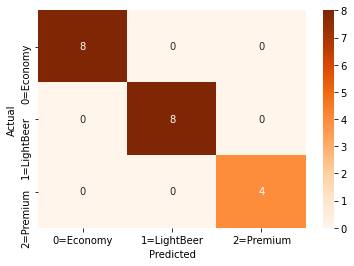

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,Y)

print(X_lda)

#print(X_lda)
VarExplained=lda.explained_variance_ratio_
#print(VarExplained)
Model=lda.fit(X,Y)
Prediction=Model.predict(X)
Prediction
confusion=confusion_matrix(Y,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",
           xticklabels=["0=Economy","1=LightBeer","2=Premium"],
           yticklabels=["0=Economy","1=LightBeer","2=Premium"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [22]:
print(Model.coef_)
Scores=Model.decision_function(X)
Scores=pd.DataFrame(Scores)
Scores.columns=["Economy","LightBeer","Premium"]
Scores

[[-4.64631945e-02 -3.01637773e-01 -1.84159081e+00 -2.24891618e+01]
 [ 5.63200409e-02  2.60509346e-01  1.41957853e+00 -4.76889331e+01]
 [-1.97136928e-02  8.22568543e-02  8.44024562e-01  1.40356190e+02]]


,Economy,LightBeer,Premium
0,-3.476886,-0.242492,-29.217188
1,-5.376997,1.477702,-28.857352
2,1.792680,-7.289176,-25.662950
3,-9.939371,-14.459136,12.141070
4,-10.840832,-16.622332,18.270386
5,-2.378918,8.909285,-49.716678
6,-8.430583,6.414345,-32.623467
7,-7.103963,3.642110,-29.732237
8,0.858783,-4.647272,-29.078966
9,2.591203,-3.800889,-34.236572


In [25]:
Posterior=(Model.predict_proba(X))
Posterior=pd.DataFrame(Posterior)
Posterior.columns=["Economy","LightBeer","Premium"]
print(Posterior.round(4))

    Economy  LightBeer  Premium
0    0.0379     0.9621      0.0
1    0.0011     0.9989      0.0
2    0.9999     0.0001      0.0
3    0.0000     0.0000      1.0
4    0.0000     0.0000      1.0
5    0.0000     1.0000      0.0
6    0.0000     1.0000      0.0
7    0.0000     1.0000      0.0
8    0.9960     0.0040      0.0
9    0.9983     0.0017      0.0
10   0.0192     0.9808      0.0
11   0.9780     0.0220      0.0
12   0.9656     0.0344      0.0
13   0.0000     0.0000      1.0
14   0.0000     0.0000      1.0
15   1.0000     0.0000      0.0
16   0.0182     0.9818      0.0
17   0.0001     0.9999      0.0
18   1.0000     0.0000      0.0
19   0.9998     0.0002      0.0
